<a href="https://colab.research.google.com/github/mauriciochaiben/ProjetosPython/blob/main/Aula8_Analise_Explorat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [3]:
#upload do arquivo
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [4]:
#criando DataFrame
df = pd.read_excel('AdventureWorks.xlsx')

In [5]:
#Visualizando as 5 primeiras linhas
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [6]:
#quantidade de linhas e colunas
df.shape

(904, 16)

In [7]:
#Verificando os tipos de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [8]:
#Qual a Receita total?
df['Valor Venda'].sum()

5984606.1426

In [9]:
#Qual o custo Total?
df["custo"] = df['Custo Unitário'].mul(df['Quantidade'])

In [10]:
df.head

<bound method NDFrame.head of     Data Venda Data Envio  ID Loja  ...   Classe    Cor    custo
0   2008-05-09 2008-05-29      199  ...  Regular    Red  2091.48
1   2008-05-12 2008-05-17      306  ...  Regular    Red  2091.48
2   2008-05-14 2008-05-20      306  ...  Regular    Red  2091.48
3   2008-05-21 2008-05-27      306  ...  Regular    Red  2091.48
4   2008-06-20 2008-06-27      306  ...  Regular    Red  2091.48
..         ...        ...      ...  ...      ...    ...      ...
899 2008-03-22 2008-04-04      306  ...  Regular  Black  1985.94
900 2008-10-04 2008-10-15      306  ...  Regular  Black  1948.14
901 2008-12-11 2008-12-15      306  ...  Regular  Black  1948.14
902 2008-12-17 2008-12-21      306  ...  Regular  Black  1985.94
903 2008-12-21 2008-12-25      306  ...  Regular  Black  1948.14

[904 rows x 17 columns]>

In [11]:
#Qual o custo total?
round(df['custo'].sum(), 2)

2486783.05

In [12]:
#Agora que temos a recita e o custo e o total, podemos achar o Lucro total 
#Vamos criar uma coluna de Lucro que será Receita - Custo
df['lucro'] = df['Valor Venda'] - df['custo']

In [13]:
df.head

<bound method NDFrame.head of     Data Venda Data Envio  ID Loja  ...    Cor    custo    lucro
0   2008-05-09 2008-05-29      199  ...    Red  2091.48  2456.52
1   2008-05-12 2008-05-17      306  ...    Red  2091.48  2456.52
2   2008-05-14 2008-05-20      306  ...    Red  2091.48  2456.52
3   2008-05-21 2008-05-27      306  ...    Red  2091.48  2456.52
4   2008-06-20 2008-06-27      306  ...    Red  2091.48  2456.52
..         ...        ...      ...  ...    ...      ...      ...
899 2008-03-22 2008-04-04      306  ...  Black  1985.94  3588.48
900 2008-10-04 2008-10-15      306  ...  Black  1948.14  2755.86
901 2008-12-11 2008-12-15      306  ...  Black  1948.14  2755.86
902 2008-12-17 2008-12-21      306  ...  Black  1985.94  2809.26
903 2008-12-21 2008-12-25      306  ...  Black  1948.14  2755.86

[904 rows x 18 columns]>

In [14]:
#Total de Lucro
round(df['lucro'].sum(), 2)

3497823.09

In [15]:
#Criando uma coluna com total de dias para enviar o produto
df['Tempo_envio'] = df['Data Envio'] - df['Data Venda']
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


In [16]:
#extraindo apenas os dias 
df['Tempo_envio'] = (df['Data Envio'] - df['Data Venda']).dt.days
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [17]:
#Verificando o tipo de coluna Tempo_envio
df['Tempo_envio'].dtype

dtype('int64')

In [18]:
#Média do tempo de envio por marca
df.groupby('Marca')['Tempo_envio'].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_envio, dtype: float64

# Nova seção

In [19]:
#Verificando se temos dados faltantes 
df.isnull().sum

<bound method DataFrame.sum of      Data Venda  Data Envio  ID Loja  ...  custo  lucro  Tempo_envio
0         False       False    False  ...  False  False        False
1         False       False    False  ...  False  False        False
2         False       False    False  ...  False  False        False
3         False       False    False  ...  False  False        False
4         False       False    False  ...  False  False        False
..          ...         ...      ...  ...    ...    ...          ...
899       False       False    False  ...  False  False        False
900       False       False    False  ...  False  False        False
901       False       False    False  ...  False  False        False
902       False       False    False  ...  False  False        False
903       False       False    False  ...  False  False        False

[904 rows x 19 columns]>

In [21]:
#Vamos agrupar por ano e marca
df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: lucro, dtype: float64

In [22]:
pd.options.display.float_format = '{:20, 2f}'.format

In [23]:
#Resetando o index
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum().reset_index()

In [24]:
#Qual o total de produtos vendidos?
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

Text(0, 0.5, 'Produto')

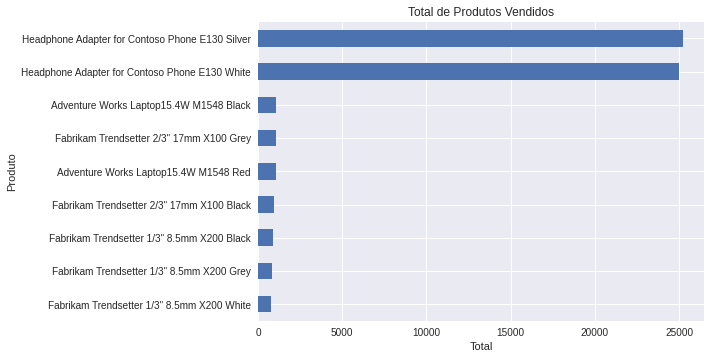

In [25]:
#Gráfico Total de Produtos Vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total de Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto")

Text(0, 0.5, 'Receita')

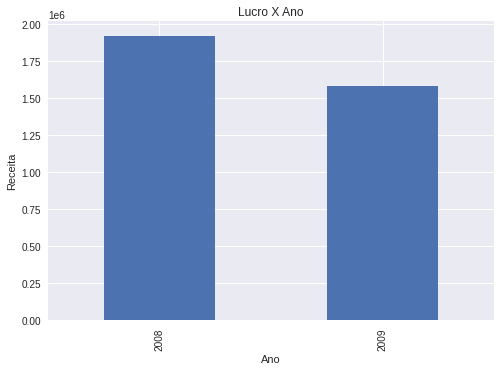

In [28]:
df.groupby(df["Data Venda"].dt.year)["lucro"].sum().plot.bar(title="Lucro X Ano")
plt.xlabel("Ano")
plt.ylabel("Receita")

In [30]:
df.groupby(df["Data Venda"].dt.year)["lucro"].sum()

ValueError: ignored

In [31]:
#selecionando apenas as vendas de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]

In [32]:
df_2009.head()

ValueError: ignored

ValueError: ignored